In [2]:
from  lib.project_functions import *

In [ ]:
def load_csv_file(file_list):
    """
    Load CSV files into pandas DataFrames and assign them as global variables.

    Args:
        file_list (list): A list of file names to load as CSV files.

    Returns:
        None

    This function iterates through the provided list of file names and loads each CSV file
    into a pandas DataFrame. The DataFrames are assigned as global variables with names
    following the pattern 'csv_<file_name_without_extension>'.

    Note:
    - Ensure you have the required library (pandas) imported before using this function.
    - The function will only load files with a '.csv' extension from the specified list.
    - Global variables with names based on the loaded file names will be created, allowing
      access to the DataFrames globally.
    """
    for file in file_list:
        if ".csv" in file:
            # Extract the base file name without extension
            name_file = file.split(".")
            
            # Read the CSV file and assign it as a global variable
            globals()[f"csv_{name_file[0]}"] = pd.read_csv(f"data/{file}") 

# EDA

In [ ]:
classes = { 0:'Speed limit (20km/h)',1:'Speed limit (30km/h)', 2:'Speed limit (50km/h)', 
           3:'Speed limit (60km/h)', 4:'Speed limit (70km/h)', 5:'Speed limit (80km/h)',
           6:'End of speed limit (80km/h)', 7:'Speed limit (100km/h)', 8:'Speed limit (120km/h)',
           9:'No passing', 10:'No passing veh over 3.5 tons', 11:'Right-of-way at intersection',
           12:'Priority road', 13:'Yield', 14:'Stop', 15:'No vehicles', 
           16:'Veh > 3.5 tons prohibited', 17:'No entry', 18:'General caution', 
           19:'Dangerous curve left', 20:'Dangerous curve right', 21:'Double curve', 
           22:'Bumpy road', 23:'Slippery road', 24:'Road narrows on the right', 
           25:'Road work', 26:'Traffic signals', 27:'Pedestrians', 28:'Children crossing', 
           29:'Bicycles crossing', 30:'Beware of ice/snow',31:'Wild animals crossing', 
           32:'End speed + passing limits', 33:'Turn right ahead', 34:'Turn left ahead', 
           35:'Ahead only', 36:'Go straight or right', 37:'Go straight or left', 38:'Keep right',
           39:'Keep left', 40:'Roundabout mandatory', 41:'End of no passing',
           42:'End no passing veh > 3.5 tons' }

In [ ]:
file_list = sorted(os.listdir("data"))
load_csv_file(file_list)

In [ ]:
csv_Train.sample(5)

In [ ]:
classid_count = csv_Train['ClassId'].value_counts()
classid_count

In [ ]:
train_path = 'data/Train'
folders = os.listdir(train_path)
train_number = []
class_num = []
for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]
plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')

In [ ]:
csv_Train.describe()

## experiments with photo enhancements

In [ ]:
# path = "data\Train"
# for folders in os.listdir(path):
#     path_image_folder = os.path.join(path, folders)
#     for image_name in os.listdir(path_image_folder):
#         path_imeg = os.path.join(path_image_folder, image_name)
#         image = Image.open(path_imeg)
#         image=image.resize((30,30))
#         image=image.convert("RGB")
#         plt.imshow(image)
        
#         print(path_imeg)
#         break
#     break

In [ ]:
data = loading_random_data()
data.shape

In [ ]:
for image in data:
    print(image.min(), image.max())
    image_show(image)
    show_histogram(image)

In [ ]:
for image in data:
    image = histogram_equalization(image)
    image_show( image)
    show_histogram(image)

In [ ]:
for image in data:
    image =  contour_alignment(image)
    image_show(image)
    show_histogram(image)

In [ ]:
for image in data:
    image = cv.medianBlur(image, 5)
    image_show(image)
    # show_histogram(image)

In [ ]:
for image in data:
    image_show(contour_in_binarized_image(image))

In [ ]:
for image in data:
    image_show(otsu_threshold_contours(image))
    image_show(adaptive_threshold_contours(image))

In [ ]:
for image in data:
    image = cv.medianBlur(image, ksize = 5) 
    image = histogram_equalization(image)
    image = contour_alignment(image, tileGridSize=(8, 8))
    image = contour_in_binarized_image(image)
    image = otsu_threshold_contours(image)
    # image = adaptive_threshold_contours(image)
    
    image_show(image)

In [ ]:
def median_blur(image, ksize = 5):
    return cv.medianBlur(image, ksize)

## favorite
 

In [ ]:
def image_preprocessing(image):
    image = cv.detailEnhance(image, sigma_s=50, sigma_r=0.3)
    image = cv.medianBlur(image, 3)
    image = cv.addWeighted(image, 1.5, image, -0.5, 0)
    # image = otsu_threshold_contours(image)
    
    return image

for image in data:
    image_show(image)
    image = image_preprocessing(image)
    image_show(image)

# Data preparation

### Apply our photo enhancement to all data and save it in a new folder

In [ ]:
edit_training_data()

### We divide our training data into train and validation

In [ ]:
create_validation_data()

# Let's create a data generator so we don't have to keep all our photo-related data in memory

In [3]:
train, val = generator(train = True, validation = True, generator_batch_size= 512)

Found 20185 images belonging to 43 classes.
Found 3672 images belonging to 43 classes.


In [8]:
num_classes = 43
inp_shape = (32, 32, 3)

# EarlyStopping

In [17]:
callback = EarlyStopping(
    patience=100,
    monitor="val_f1",
    restore_best_weights=True,
    min_delta=0.0001
)

# My model 

In [59]:
inputs = Input(shape=(32, 32, 3))

conv1 = Conv2D(32, (3, 3),  padding="same")(inputs)
conv1 = Activation('relu')(conv1)
conv1 = Conv2D(64, (3, 3),  padding="same")(conv1)
conv1 = Activation('relu')(conv1)
conv1 = Conv2D(128, (3, 3),  padding="same")(conv1)
conv1 = BatchNormalization()(conv1)
conv1 = Activation('relu')(conv1)
dropout1 = Dropout(0.3)(conv1)
pooling1 = MaxPooling2D()(dropout1)


conv2 = Conv2D(256, (3, 3),  padding="same")(pooling1)
conv2 = Activation('relu')(conv2)
conv2 = Conv2D(512, (3, 3),  padding="same")(conv2)
conv2 = Activation('relu')(conv2)
conv2 = Conv2D(512, (3, 3),  padding="same")(conv2)
conv2 = BatchNormalization()(conv2)
conv2 = Activation('relu')(conv2)
dropout2 = Dropout(0.2)(conv2)
pooling2 = MaxPooling2D()(dropout2)

flattened = Flatten()(pooling2)
outputs = Dense(units=43, activation="softmax")(flattened)

model = Model(inputs=inputs, outputs=outputs)


model.compile(optimizer='adam', loss='categorical_crossentropy', 
               metrics=[f1, "accuracy"]) 

checkpoint = ModelCheckpoint(
    filepath = "modelcheckpoint/my_image_model.h5",  
    monitor='val_f1', 
    verbose=1,  
    save_best_only=True,  
    mode='min'  
)

hist = hist = model.fit(train, epochs=1000, validation_data=val, verbose=1,
          callbacks=[callback, checkpoint])

Epoch 1/1000
40/40 [==============================] - ETA: 0s - loss: 11.8825 - f1: 0.0164 - accuracy: 0.0474 
Epoch 1: val_f1 improved from inf to 0.00000, saving model to modelcheckpoint\my_image_model.h5
40/40 [==============================] - 1102s 28s/step - loss: 11.8825 - f1: 0.0164 - accuracy: 0.0474 - val_loss: 4.8115 - val_f1: 0.0000e+00 - val_accuracy: 0.0523
Epoch 2/1000
40/40 [==============================] - ETA: 0s - loss: 3.3855 - f1: 8.7192e-04 - accuracy: 0.0915 
Epoch 2: val_f1 did not improve from 0.00000
40/40 [==============================] - 1093s 27s/step - loss: 3.3855 - f1: 8.7192e-04 - accuracy: 0.0915 - val_loss: 4.3885 - val_f1: 0.0000e+00 - val_accuracy: 0.0523
Epoch 3/1000
40/40 [==============================] - ETA: 0s - loss: 3.2109 - f1: 0.0090 - accuracy: 0.1201 
Epoch 3: val_f1 did not improve from 0.00000
40/40 [==============================] - 1094s 27s/step - loss: 3.2109 - f1: 0.0090 - accuracy: 0.1201 - val_loss: 3.9769 - val_f1: 0.0000e+00

In [61]:
model.save("models_save/my_image_model_1.keras")

In [63]:
# visualize_training_history(hist, save=True, name="my_image_model_")

![](models_save/my_image_model_.png)

# Model ConvNeXtTiny 

## Preparing the ConvNeXtTiny model

In [22]:
convnext_tiny  = tf.keras.applications.convnext.ConvNeXtTiny(
                    model_name='convnext_tiny',
                    include_top=False,
                    include_preprocessing=True,
                    weights='imagenet',
                    input_tensor=None,
                    input_shape=(32, 32, 3) )

In [ ]:
print( f"len -> {len(convnext_tiny.layers)}\ntype -> {type(convnext_tiny.layers)}")

In [ ]:
# convnext_tiny.summary()

## freezing some weights

In [24]:
for layer in convnext_tiny.layers[:-20]:
    layer.trainable = False
for layer in convnext_tiny.layers:
    print(layer.name, layer.trainable)

input_2 False
convnext_tiny_prestem_normalization False
convnext_tiny_stem False
convnext_tiny_stage_0_block_0_depthwise_conv False
convnext_tiny_stage_0_block_0_layernorm False
convnext_tiny_stage_0_block_0_pointwise_conv_1 False
convnext_tiny_stage_0_block_0_gelu False
convnext_tiny_stage_0_block_0_pointwise_conv_2 False
convnext_tiny_stage_0_block_0_layer_scale False
convnext_tiny_stage_0_block_0_identity False
tf.__operators__.add False
convnext_tiny_stage_0_block_1_depthwise_conv False
convnext_tiny_stage_0_block_1_layernorm False
convnext_tiny_stage_0_block_1_pointwise_conv_1 False
convnext_tiny_stage_0_block_1_gelu False
convnext_tiny_stage_0_block_1_pointwise_conv_2 False
convnext_tiny_stage_0_block_1_layer_scale False
convnext_tiny_stage_0_block_1_identity False
tf.__operators__.add_1 False
convnext_tiny_stage_0_block_2_depthwise_conv False
convnext_tiny_stage_0_block_2_layernorm False
convnext_tiny_stage_0_block_2_pointwise_conv_1 False
convnext_tiny_stage_0_block_2_gelu Fals

## preparing the model for training and training the model

In [56]:
inputs = tf.keras.Input(shape=(32, 32, 3))

convnext = convnext_tiny(inputs)
print("Shape of time_distributed_output:", convnext.shape)

flattened = Flatten()(convnext)

dance = layers.Dense(1024, activation='relu')(flattened)
dance = layers.Dense(512, activation='relu')(dance)
dance = layers.Dense(512, activation="relu")(dance)
print("Shape of dance:", dance.shape)

outputs = layers.Dense(num_classes, activation="softmax")(dance)

print("Shape of outputs:", outputs.shape)

convnext_model = tf.keras.Model(inputs=inputs, outputs=outputs)

convnext_model.compile(optimizer='adam', loss='categorical_crossentropy', 
               metrics=[f1, "accuracy"]) 


checkpoint = ModelCheckpoint(
    filepath = "modelcheckpoint/convnext_image_model.h5",  
    monitor='val_f1', 
    verbose=1,  
    save_best_only=True,  
    mode='min'  
)

convnext_hist = convnext_model.fit(train, epochs=1000, validation_data=val, verbose=1,
          callbacks=[callback, checkpoint])

Shape of time_distributed_output: (None, 1, 1, 768)
Shape of dance: (None, 512)
Shape of outputs: (None, 43)
Epoch 1/1000
40/40 [==============================] - ETA: 0s - loss: 3.3475 - f1: 0.0185 - accuracy: 0.1011
Epoch 1: val_f1 improved from inf to 0.03542, saving model to modelcheckpoint\convnext_image_model.h5


C:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - 277s 7s/step - loss: 3.3475 - f1: 0.0185 - accuracy: 0.1011 - val_loss: 3.4036 - val_f1: 0.0354 - val_accuracy: 0.1182
Epoch 2/1000
40/40 [==============================] - ETA: 0s - loss: 3.2370 - f1: 0.0386 - accuracy: 0.1207
Epoch 2: val_f1 did not improve from 0.03542
40/40 [==============================] - 263s 7s/step - loss: 3.2370 - f1: 0.0386 - accuracy: 0.1207 - val_loss: 3.3416 - val_f1: 0.0609 - val_accuracy: 0.1432
Epoch 3/1000
40/40 [==============================] - ETA: 0s - loss: 3.1487 - f1: 0.0596 - accuracy: 0.1356
Epoch 3: val_f1 did not improve from 0.03542
40/40 [==============================] - 259s 6s/step - loss: 3.1487 - f1: 0.0596 - accuracy: 0.1356 - val_loss: 3.4330 - val_f1: 0.0638 - val_accuracy: 0.1373
Epoch 4/1000
40/40 [==============================] - ETA: 0s - loss: 3.1501 - f1: 0.0583 - accuracy: 0.1334
Epoch 4: val_f1 did not improve from 0.03542
40/40 [==============================] - 257s 6s/step - lo

In [57]:
convnext_model.save("models_save/convnext_image_model_1.keras")

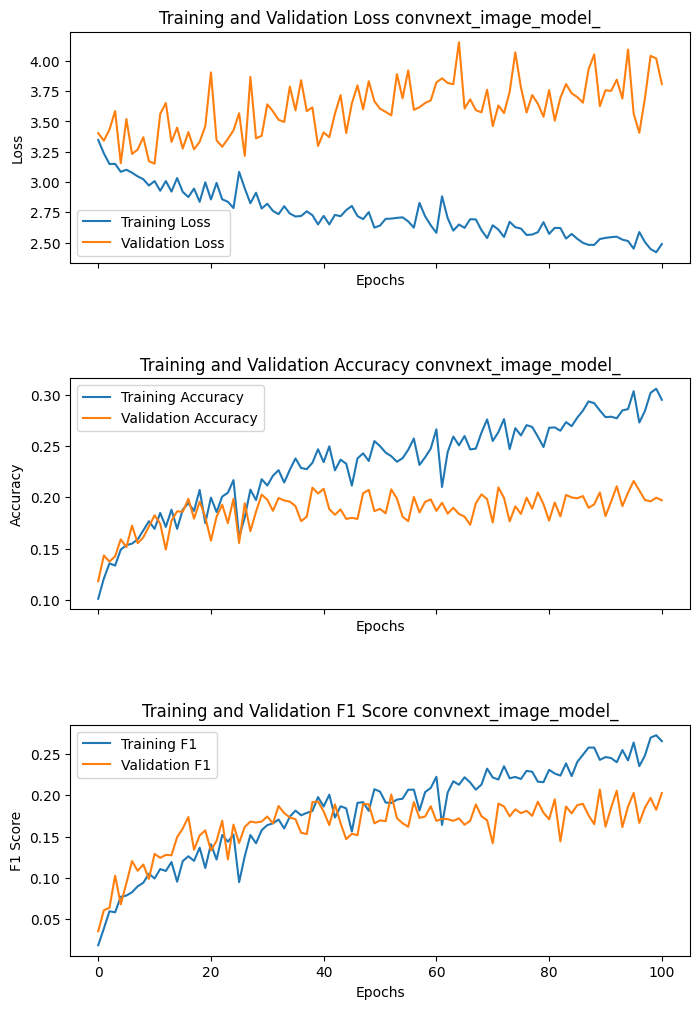

In [58]:
visualize_training_history(convnext_hist, save=True, name="convnext_image_model_")

# Model VGG16

## Preparing the VGG16 model

In [5]:
# Загрузка предварительно обученной модели VGG16 без верхних слоев (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

## freezing some weights

In [6]:
for layer in base_model.layers:
    layer.trainable = False

## preparing the model for training and training the model

In [21]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

vgg16_model = Model(inputs=base_model.input, outputs=predictions)

vgg16_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',
                    metrics=[f1, "accuracy"])

# Вывод структуры модели
# model.summary()

checkpoint = ModelCheckpoint(
    filepath = "modelcheckpoint/vgg16_image_model.h5",  
    monitor='val_f1', 
    verbose=1,  
    save_best_only=True,  
    mode='min'  
)

vgg16_hist = vgg16_model.fit(train, epochs=1000, validation_data=val, verbose=1,
                                 callbacks=[callback, checkpoint])

Epoch 1/1000
40/40 [==============================] - ETA: 0s - loss: 3.4336 - f1: 0.0000e+00 - accuracy: 0.1346
Epoch 1: val_f1 improved from inf to 0.00000, saving model to modelcheckpoint\vgg16_image_model.h5
40/40 [==============================] - 95s 2s/step - loss: 3.4336 - f1: 0.0000e+00 - accuracy: 0.1346 - val_loss: 3.1894 - val_f1: 0.0000e+00 - val_accuracy: 0.1661
Epoch 2/1000


C:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


40/40 [==============================] - ETA: 0s - loss: 2.9855 - f1: 0.0026 - accuracy: 0.2250
Epoch 2: val_f1 did not improve from 0.00000
40/40 [==============================] - 93s 2s/step - loss: 2.9855 - f1: 0.0026 - accuracy: 0.2250 - val_loss: 2.8899 - val_f1: 0.0116 - val_accuracy: 0.2157
Epoch 3/1000
40/40 [==============================] - ETA: 0s - loss: 2.7101 - f1: 0.0183 - accuracy: 0.2671
Epoch 3: val_f1 did not improve from 0.00000
40/40 [==============================] - 93s 2s/step - loss: 2.7101 - f1: 0.0183 - accuracy: 0.2671 - val_loss: 2.6758 - val_f1: 0.0375 - val_accuracy: 0.2546
Epoch 4/1000
40/40 [==============================] - ETA: 0s - loss: 2.5160 - f1: 0.0516 - accuracy: 0.3079
Epoch 4: val_f1 did not improve from 0.00000
40/40 [==============================] - 93s 2s/step - loss: 2.5160 - f1: 0.0516 - accuracy: 0.3079 - val_loss: 2.5505 - val_f1: 0.0563 - val_accuracy: 0.2726
Epoch 5/1000
40/40 [==============================] - ETA: 0s - loss: 2.37

In [20]:
vgg16_model.save("models_save/vgg16_image_model_1.keras")

In [46]:
# visualize_training_history(vgg16_hist, save=True, name="vgg16_image_model_100_epok")

![](models_save/vgg16_image_model_100_epok.png)

# evaluate

In [ ]:
loaded_model = load_model("modelcheckpoint/image_model.h5")

In [ ]:
model_evaluate = loaded_model.evaluate(train)

# Test on my data 

In [ ]:
def my_foto(show = None):
    data_path = "data\MyFoto"
    my_foto_names = os.listdir(data_path)
    images = []
    
    for foto_name in my_foto_names:
        path = os.path.join(data_path, foto_name)
       
        image_cv = cv.imread(path)
        image_cv = cv.cvtColor(image_cv, cv.COLOR_BGR2RGB)
        # image_cv = image_preprocessing(image_cv)
        # resize image
        image_cv = cv.resize(image_cv, ( 32, 32), interpolation=cv.INTER_LINEAR)
        image_cv = image_cv / 255.0
        
        if show:
            image_show(image_cv)
            
        image_cv = np.expand_dims(image_cv, axis=0)  
        images.append(image_cv)
    
    return images

def predict(images, model ):
    predicted_classes = []
    for image in images:
        predicted_probabilities = model.predict(image)
        predicted_classes.append(np.argmax(predicted_probabilities, axis=1))
    return predicted_classes

images = my_foto( show = True)
# predicted = predict(images, loaded_model)
images[0].shape

In [ ]:
images[3].shape

In [ ]:
data_path = "data\Meta"
meta = os.listdir(data_path)

for klass, m, image in zip(predicted, meta, images):
    num_im_m = str(klass.item()) + ".png"
    path = os.path.join(data_path, num_im_m)
    image_2 = cv.imread(path)
    image_2 = cv.cvtColor(image_2, cv.COLOR_BGR2RGB)
    

    image_restored = np.squeeze(image, axis=0)  # Удаление добавленного измерения
    
    print(klass)
    image_show(image_2)
    image_show(image_restored)